In [2]:
#导入numpy
import numpy as np
#导人画图工具
import matplotlib.pyplot as plt


from matplotlib.colors import ListedColormap
#导入tree 模型和数据集加载工具
from sklearn import tree,datasets
#导入数据集拆分工具
from sklearn.model_selection import train_test_split
wine = datasets.load_wine()
#只选取数据集的前两个特征
X =wine.data[:,:2]
y =wine.target
#刊号数据集拆分为训练集和测试集
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [3]:
X_train.shape

(133, 2)

In [4]:
#设定决策树分类器最大深度为1
clf=tree.DecisionTreeClassifier(max_depth=5)#tree里面有decision tree
#拟合训练数据集
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [5]:
#定义图像中分区的颜色和散点的颜色
cmap_light = ListedColormap(["#FFAAAA", "#AAFFAA","#AAAAFF"])
cmap_bold = ListedColormap ([ "#FF0000","#00FF00","#0000FF"])
#分别用样本的两个特征值创建图像和横轴和纵轴
x_min,x_max= X_train[:,0].min()-1 , X_train[:,0].max() + 1
y_min , y_max = X_train [ :, 1].min()-1,X_train [ :, 1].max() + 1
xx,yy = np.meshgrid(np.arange(x_min,x_max, 0.02),
np.arange(y_min,y_max , 0.02))
Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])


In [6]:
yy.shape

(346, 271)

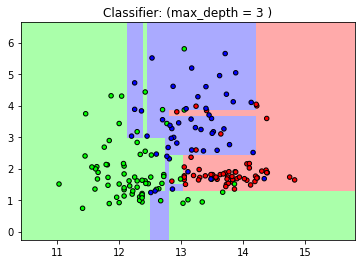

In [7]:
#给每个分类中的样本分配不同的颜色
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx , yy , Z , cmap=cmap_light)
#用散点把样本表示出来
plt.scatter(X[ :,0], X[ :, 1], c=y, cmap=cmap_bold , edgecolor= "k",s =20 )
plt.xlim(xx.min() , xx.max () )#横纵坐标的范围
plt.ylim (yy.min () , yy.max ())
plt.title(  "Classifier: (max_depth = 3 )"  )
plt.show()

In [8]:
clf.score(X_test,y_test)#depth不一定是越大越好

0.7777777777777778

In [24]:
#导入graphviz工具
import os
os.environ["PATH"] += os.pathsep + 'D:\桌面\graphviz-2.44.2~dev.20200818.1009-win32\Graphviz\bin'
#dot -Tpng wine.dot -o wine.png，到对应Dot文件的目录下面执行这个语句
import graphviz
#导入决策树中输出graphviz的接口
from sklearn.tree import export_graphviz
#选择最大深度为3的分类模型
export_graphviz(clf,out_file="wine.dot",class_names=wine.target_names,
feature_names=wine.feature_names[:2],impurity=False,filled=True)
#打开一个dot文件
#path=""C:\Users\admin\temp_inpynb\MachineLearning\""
#D:\桌面\graphviz-2.44.2~dev.20200818.1009-win32\Graphviz\bin
# with open ("wine.dot") as f:
#     dot_graph = f.read()
# #显示dot文件中的图形
# graphviz.Source(dot_graph)